In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
df= pd.read_csv("/kaggle/input/insurance/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df[df.duplicated()]


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
df.drop_duplicates(inplace=True)



In [9]:
df.duplicated().sum()

0

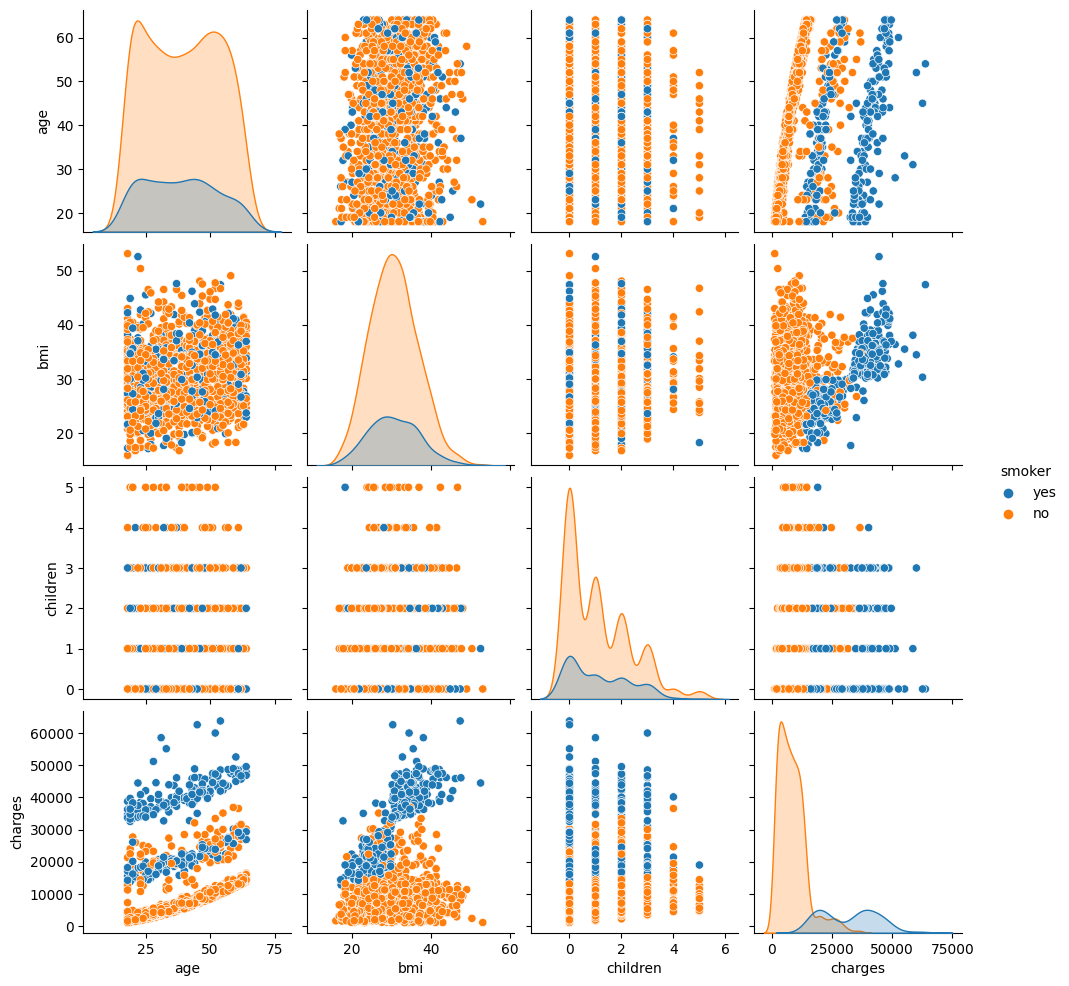

In [10]:
sns.pairplot(df, hue="smoker", diag_kind="kde")
plt.show()


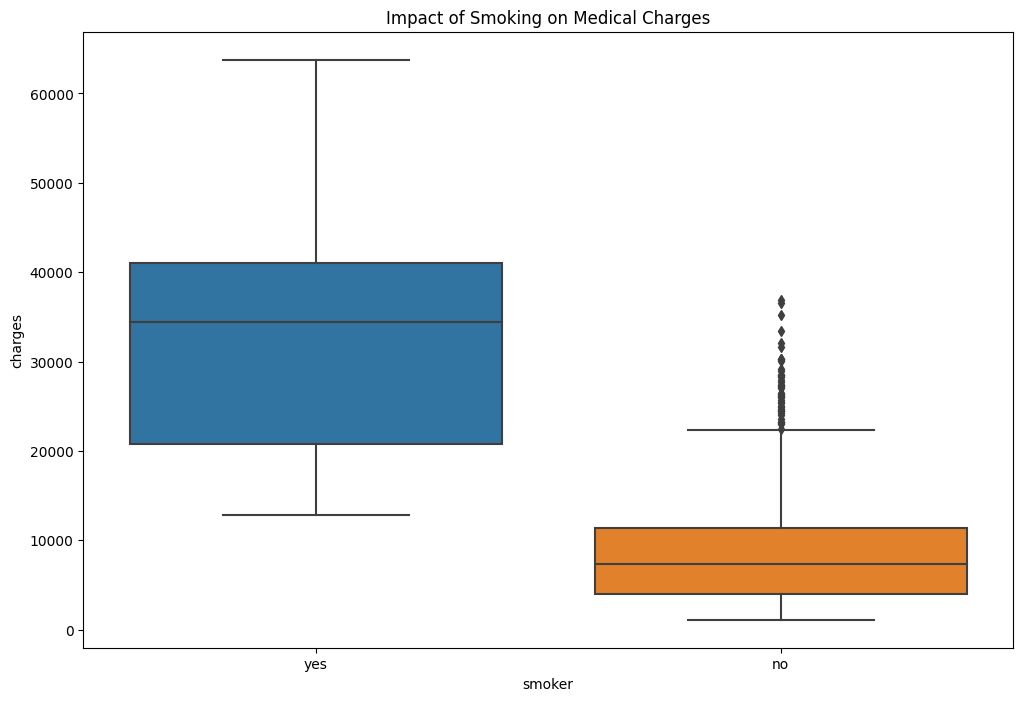

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Impact of Smoking on Medical Charges')
plt.show()

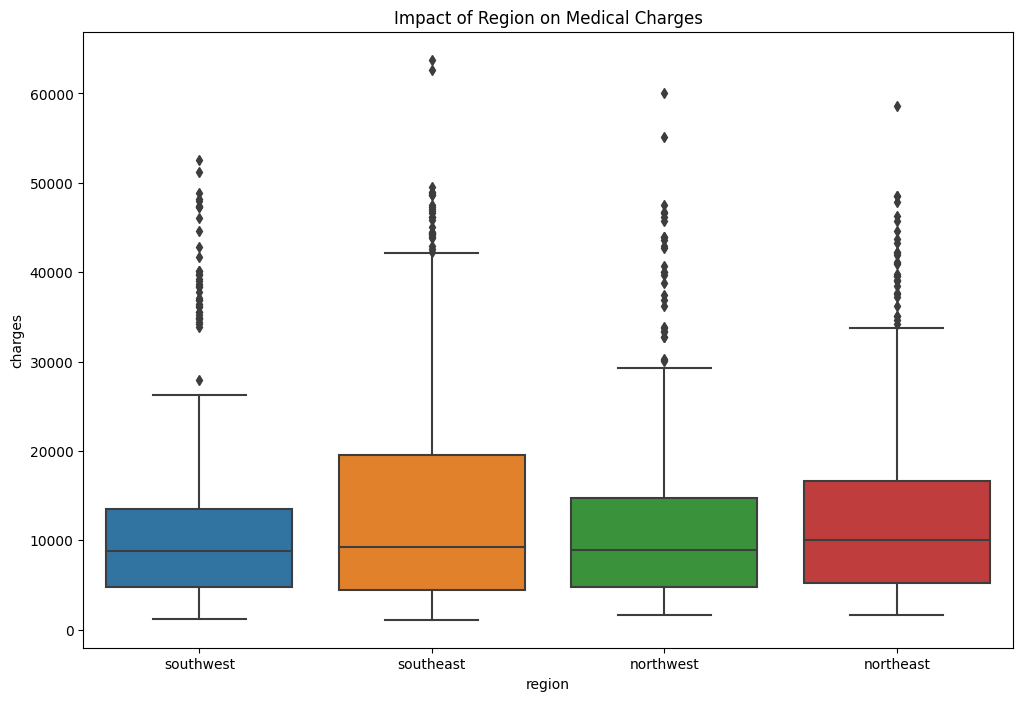

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='region', y='charges')
plt.title('Impact of Region on Medical Charges')
plt.show()


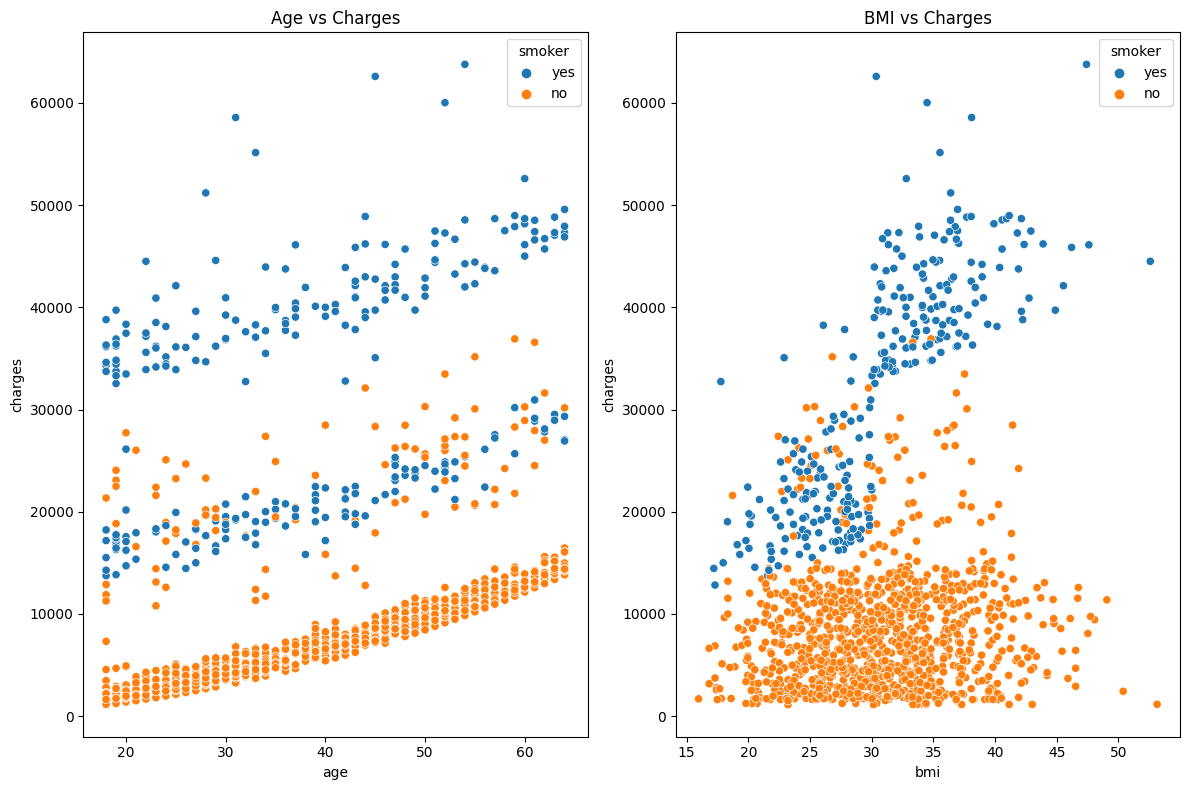

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title("Age vs Charges")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs Charges')

plt.tight_layout()
plt.show()

In [14]:
label = {}
for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label[col] = le

In [15]:
scaler = StandardScaler()
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])

In [16]:
X = df.drop(columns=['charges'])
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import Ridge, Lasso  
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

In [19]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

In [20]:
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2= r2_score(y_test, y_pred_lasso)

print(f"Ridge Regression MSE:  {ridge_mse:.2f}, R2: {ridge_r2:.4f}")
print(f"Lasso Regression MSE:  {lasso_mse:.2f}, R2: {lasso_r2:.4f}")

Ridge Regression MSE:  35673339.97, R2: 0.8059
Lasso Regression MSE:  35493216.37, R2: 0.8068


In [21]:
feature_importance = pd.Series(lasso.coef_, index=X.columns)
important_features = feature_importance[feature_importance != 0]
print("Important Features Selected by Lasso Regression:")
print(important_features.sort_values(ascending=False))


Important Features Selected by Lasso Regression:
smoker      23052.084599
age          3492.410434
bmi          1906.335792
children      643.671034
sex           -99.649637
region       -237.614966
dtype: float64


In [22]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")
print(f'Linear Regression R: {r2_lr}')

Linear Regression MSE: 35493102.611650474
Linear Regression R: 0.8068466322629114


In [23]:
feature_importance_lr = pd.Series(lr_model.coef_, index=X.columns)
print("Importance Features selected by Linear Regression ")
print(feature_importance_lr.sort_values(ascending=False))

Importance Features selected by Linear Regression 
smoker      23052.152752
age          3492.418592
bmi          1906.348281
children      643.680015
sex           -99.695394
region       -237.625147
dtype: float64


In [24]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R: {r2_rf}") 

Random Forest MSE: 21524784.061487958
Random Forest R: 0.8828621837662257


In [25]:
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
print("Importances Features selected by Random Forest")
print(feature_importances_rf.sort_values(ascending=False))

Importances Features selected by Random Forest
smoker      0.600777
bmi         0.216233
age         0.136493
children    0.023249
region      0.016107
sex         0.007141
dtype: float64


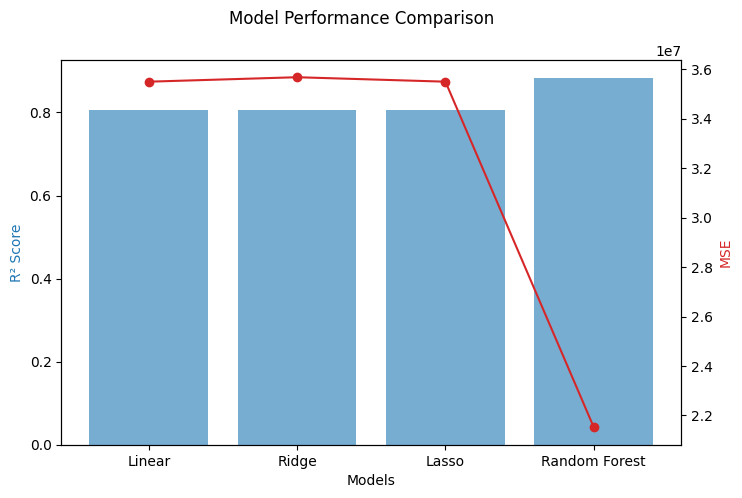

In [26]:
models = ["Linear", "Ridge", "Lasso", "Random Forest"]
r2_scores = [0.8068, 0.8059, 0.8068, 0.8829]
mse_scores = [35493102.61, 35673339.97, 35493216.37, 21524784.06]

fig, ax1 = plt.subplots(figsize=(8,5))


ax1.set_xlabel("Models")
ax1.set_ylabel("R² Score", color="tab:blue")
ax1.bar(models, r2_scores, color="tab:blue", alpha=0.6, label="R² Score")


ax2 = ax1.twinx()
ax2.set_ylabel("MSE", color="tab:red")
ax2.plot(models, mse_scores, marker="o", color="tab:red", label="MSE")

fig.suptitle("Model Performance Comparison")
plt.show()

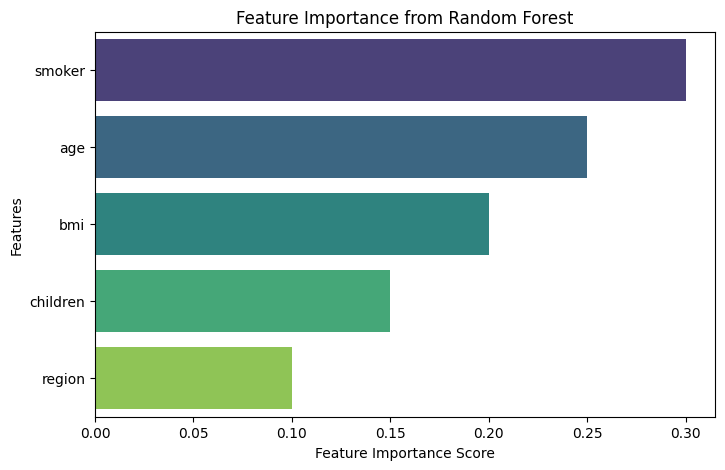

In [27]:
feature_importances_rf = {
    "Feature": ["age", "bmi", "children", "smoker", "region"],
    "Importance": [0.25, 0.20, 0.15, 0.30, 0.10]  # Example values from your RF model
}

df_importance = pd.DataFrame(feature_importances_rf).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=df_importance["Importance"], y=df_importance["Feature"], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.show()

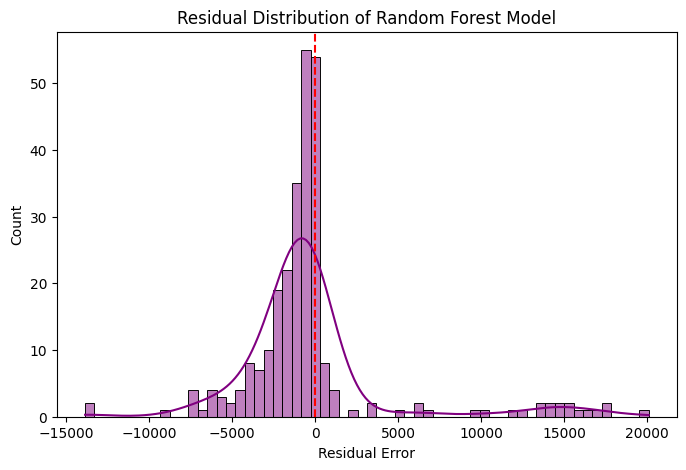

In [28]:
residuals = y_test - y_pred_rf  

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color="purple")
plt.axvline(0, color="red", linestyle="dashed")
plt.xlabel("Residual Error")
plt.title("Residual Distribution of Random Forest Model")
plt.show()

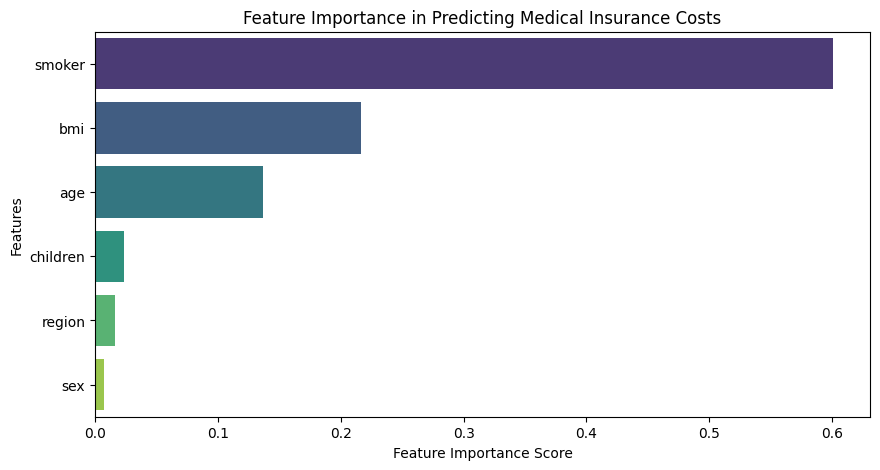

In [29]:
feature_importance = rf_model.feature_importances_

feature_names = X_train.columns


importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10,5))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Medical Insurance Costs")
plt.show()

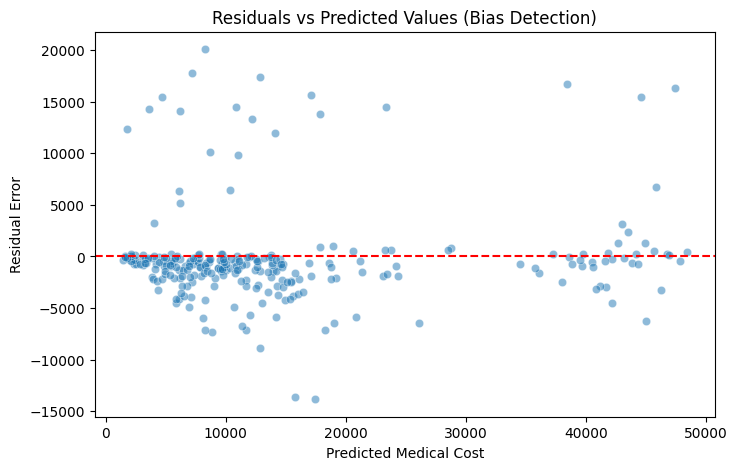

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=rf_model.predict(X_test), y=residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="dashed")  # Ideal zero-error line
plt.xlabel("Predicted Medical Cost")
plt.ylabel("Residual Error")
plt.title("Residuals vs Predicted Values (Bias Detection)")
plt.show()

In [31]:
df.to_csv("medical_cost_prediction.csv")